## Assignment 4: Obsevational Studies and Applied ML

### Deadline
November 21st,11:59PM

### Important notes

Make sure you push on GitHub your notebook with all the cells already evaluated. Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you implemented. Back up any hypotheses and claims with data, since this is an important aspect of the course. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the data files necessary) in the master branch. If there are multiple notebooks present, we will not grade anything.

Use this legendary link to create your repository: [link](https://classroom.github.com/g/YXtsr0QK)

In [1]:
# Put your imports here
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression


In [2]:
data_folder = './data/'

## Task 1: Boosting the economy by incentivizing self-employment

Assume the biggest priority of the local government in 2018 is to increase per-capita income. To do so, the officials plan to adopt a strategy for incentivizing self-employment through a series of campaigns, educational programs, and dedicated funds.

Since it is unethical and impossible in this setting to run a controlled experiment involving citizens (e.g., fire employees and force them to self-employ), the officials have asked you, the data scientist, to establish the effect of self-employment on the economy, relying on observational data.

**A)** You will be working with the full US 2015 census dataset (acs2015_county_data.csv, available at https://www.kaggle.com/muonneutrino/us-census-demographic-data#acs2015_county_data.csv). Using suitable methods, determine and quantify the dependency between the percentage of self-employed citizens and per capita income across all 3,212 US counties. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?

**B)** The pilot program will involve all counties within a limited set of three US states. Set A includes Wisconsin, Tennessee, and  Minnesota. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.

**C)** In which state within set A is the observed effect of self-employment on per-capita income the strongest?

**D)** Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning.

Hint: It is useful to add a notion of confidence to your results and explore the data visually. You are allowed to use the SciPy library.

### Task 1 A

In [4]:
census = pd.read_csv(data_folder+'acs2015_county_data.csv')

In [12]:
census[['State','County','TotalPop','IncomePerCap','IncomePerCapErr','SelfEmployed']]

,State,County,TotalPop,IncomePerCap,IncomePerCapErr,SelfEmployed
0,Alabama,Autauga,55221,24974,1080,5.5
1,Alabama,Baldwin,195121,27317,711,5.8
2,Alabama,Barbour,26932,16824,798,7.3
3,Alabama,Bibb,22604,18431,1618,6.7
4,Alabama,Blount,57710,20532,708,4.2
5,Alabama,Bullock,10678,17580,2055,5.4
6,Alabama,Butler,20354,18390,714,6.2
7,Alabama,Calhoun,116648,21374,489,5.0
8,Alabama,Chambers,34079,21071,1366,2.8
9,Alabama,Cherokee,26008,21811,1556,7.9


In [14]:
census['IncomePerCap'].corr(census['SelfEmployed'],method = 'pearson')

0.08727386609551799

### Task 1B & C

In [36]:
setA = census.query('State==["Wisconsin","Tennessee", "Minnesota"]')[['State','IncomePerCap','SelfEmployed']]

In [37]:
setA['IncomePerCap'].corr(setA['SelfEmployed'],method = 'pearson')

-0.2022935073652149

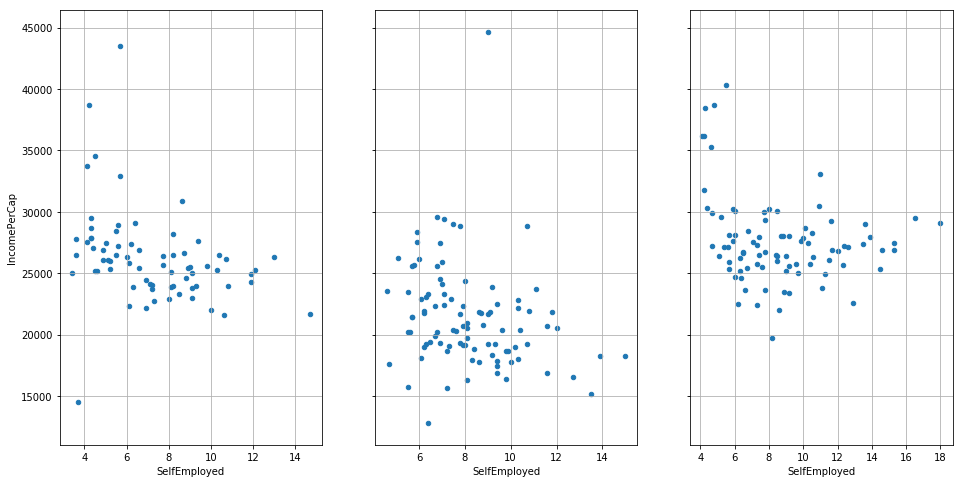

In [38]:
fig, axs = plt.subplots(1, 3, sharey=True)
setA.loc[setA['State']=="Wisconsin"].plot(kind='scatter', x='SelfEmployed', y='IncomePerCap', ax=axs[0], figsize=(16, 8), grid=True)
setA.loc[setA['State']=="Tennessee"].plot(kind='scatter', x='SelfEmployed', y='IncomePerCap', ax=axs[1], grid=True)
setA.loc[setA['State']=="Minnesota"].plot(kind='scatter', x='SelfEmployed', y='IncomePerCap', ax=axs[2], grid=True)

In [28]:
Wiscon = setA.loc[setA['State']=="Wisconsin"]
Wiscon['IncomePerCap'].corr(Wiscon['SelfEmployed'],method = 'pearson')

-0.32905300016378525

In [29]:
Tenne = setA.loc[setA['State']=="Tennessee"]
Tenne['IncomePerCap'].corr(Tenne['SelfEmployed'],method = 'pearson')

-0.23836048684913158

In [31]:
Minne = setA.loc[setA['State']=="Minnesota"]
Minne['IncomePerCap'].corr(Minne['SelfEmployed'],method = 'pearson')

-0.2538551921654063

### Task 1 D

In [42]:
setB = census.query('State==["New Jersey", "Kansas", "Rhode Island"]')[['State','IncomePerCap','SelfEmployed']]

In [40]:
setB['IncomePerCap'].corr(setB['SelfEmployed'],method = 'pearson')

-0.2322214134608568

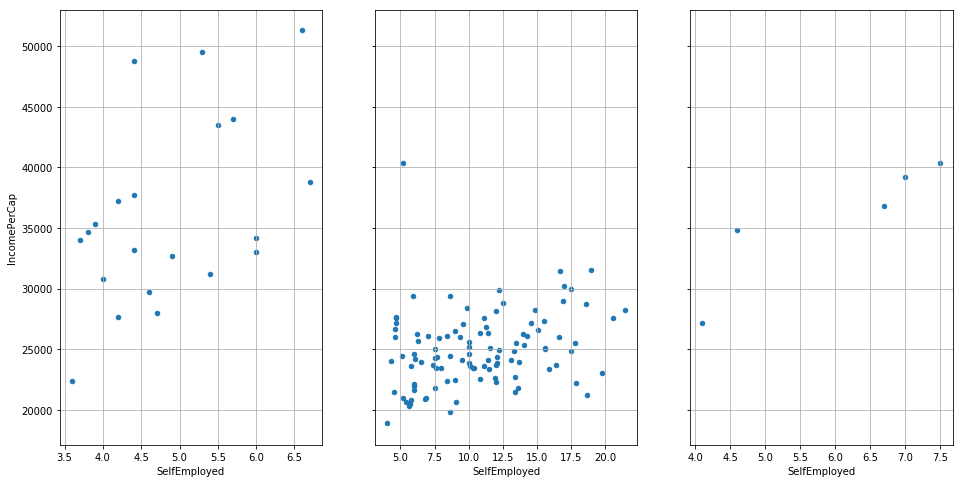

In [44]:
fig, axs = plt.subplots(1, 3, sharey=True)
setB.loc[setB['State']=="New Jersey"].plot(kind='scatter', x='SelfEmployed', y='IncomePerCap', ax=axs[0], figsize=(16, 8), grid=True)
setB.loc[setB['State']=="Kansas"].plot(kind='scatter', x='SelfEmployed', y='IncomePerCap', ax=axs[1], grid=True)
setB.loc[setB['State']=="Rhode Island"].plot(kind='scatter', x='SelfEmployed', y='IncomePerCap', ax=axs[2], grid=True)

## Task 2: All you need is love… And a dog!

Here we are going to build a classifier to predict whether an animal from an animal shelter will be adopted or not (aac_intakes_outcomes.csv, available at: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1#aac_intakes_outcomes.csv). You will be working with the following features:

1. *animal_type:* Type of animal. May be one of 'cat', 'dog', 'bird', etc.
2. *intake_year:* Year of intake
3. *intake_condition:* The intake condition of the animal. Can be one of 'normal', 'injured', 'sick', etc.
4. *intake_number:* The intake number denoting the number of occurrences the animal has been brought into the shelter. Values higher than 1 indicate the animal has been taken into the shelter on more than one occasion.
5. *intake_type:* The type of intake, for example, 'stray', 'owner surrender', etc.
6. *sex_upon_intake:* The gender of the animal and if it has been spayed or neutered at the time of intake
7. *age_upon\_intake_(years):* The age of the animal upon intake represented in years
8. *time_in_shelter_days:* Numeric value denoting the number of days the animal remained at the shelter from intake to outcome.
9. *sex_upon_outcome:* The gender of the animal and if it has been spayed or neutered at time of outcome
10. *age_upon\_outcome_(years):* The age of the animal upon outcome represented in years
11. *outcome_type:* The outcome type. Can be one of ‘adopted’, ‘transferred’, etc.

**A)** Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. Standardize the values of each feature in the data to have mean 0 and variance 1. The use of external libraries is not permitted in part A, except for numpy and pandas.

**B)** Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold. The shelter has a limited capacity and has no other option but to put to sleep animals with a low probability of adoption. What metric (precision, recall, accuracy, or F1-score) and with respect to what class is the most relevant when choosing the threshold in this scenario, and why? Explain your reasoning.

**C)** Reduce the number of features by selecting the subset of the k best features. Use greedy backward selection to iteratively remove features. Evaluate performance and visualize the result using 5-fold cross-validation on the training set as a function of k, where k = 1, 5, 10, 15, 20, 25, 30. Choose the optimal k and justify your choice. Interpret the top-k features and their impact on the probability of adoption.

**D)** Train a random forest. Use 5-fold cross-validation on the training set to fine-tune the parameters of the classifier using a grid search on the number of estimators "n_estimators" and the max depth of the trees "max_depth". For the chosen parameters, estimate the performance of your classifier on the test set by presenting the confusion matrix, accuracy, precision, recall, and F1-score with respect to both classes and compare the performance with the performance of the logistic regression. Interpret the results.

You are allowed to use the scikit-learn library to implement your classifiers.

### Task 2 A

In [27]:
intake = pd.read_csv(data_folder+'aac_intakes_outcomes.csv')
intake = intake.dropna()

In [28]:
features = intake[['animal_type','intake_year','intake_condition','intake_number','intake_type',
                   'sex_upon_intake','age_upon_intake_(years)','time_in_shelter_days','sex_upon_outcome',
                  'age_upon_outcome_(years)']]

In [29]:
features

,animal_type,intake_year,intake_condition,intake_number,intake_type,sex_upon_intake,age_upon_intake_(years),time_in_shelter_days,sex_upon_outcome,age_upon_outcome_(years)
3,Dog,2014,Normal,1.0,Owner Surrender,Neutered Male,10.000000,4.970139,Neutered Male,10.000000
11,Cat,2014,Normal,1.0,Stray,Spayed Female,14.000000,14.120139,Spayed Female,14.000000
12,Dog,2013,Normal,1.0,Owner Surrender,Neutered Male,16.000000,49.747917,Neutered Male,16.000000
13,Dog,2015,Sick,1.0,Owner Surrender,Neutered Male,14.000000,0.130556,Neutered Male,14.000000
14,Dog,2016,Aged,1.0,Public Assist,Neutered Male,17.000000,9.020139,Neutered Male,17.000000
16,Cat,2013,Aged,1.0,Euthanasia Request,Spayed Female,19.000000,0.067361,Spayed Female,19.000000
18,Dog,2013,Sick,1.0,Owner Surrender,Neutered Male,15.000000,0.066667,Neutered Male,15.000000
19,Dog,2013,Sick,1.0,Owner Surrender,Neutered Male,15.000000,0.068056,Neutered Male,15.000000
20,Dog,2015,Injured,1.0,Stray,Spayed Female,16.000000,0.940278,Spayed Female,16.000000
22,Dog,2015,Normal,1.0,Stray,Neutered Male,15.000000,23.104861,Neutered Male,15.000000


In [53]:
x = pd.get_dummies(features)
y = pd.get_dummies(intake['outcome_type']).Adoption

In [54]:
x.columns

Index(['intake_year', 'intake_number', 'age_upon_intake_(years)',
       'time_in_shelter_days', 'age_upon_outcome_(years)', 'animal_type_Bird',
       'animal_type_Cat', 'animal_type_Dog', 'animal_type_Other',
       'intake_condition_Aged', 'intake_condition_Feral',
       'intake_condition_Injured', 'intake_condition_Normal',
       'intake_condition_Nursing', 'intake_condition_Other',
       'intake_condition_Pregnant', 'intake_condition_Sick',
       'intake_type_Euthanasia Request', 'intake_type_Owner Surrender',
       'intake_type_Public Assist', 'intake_type_Stray',
       'intake_type_Wildlife', 'sex_upon_intake_Intact Female',
       'sex_upon_intake_Intact Male', 'sex_upon_intake_Neutered Male',
       'sex_upon_intake_Spayed Female', 'sex_upon_intake_Unknown',
       'sex_upon_outcome_Intact Female', 'sex_upon_outcome_Intact Male',
       'sex_upon_outcome_Neutered Male', 'sex_upon_outcome_Spayed Female',
       'sex_upon_outcome_Unknown'],
      dtype='object')

In [55]:
x_standardize = x.apply(lambda x: (x-np.mean(x))/np.std(x))

In [59]:
# split the dataset into 20% and 80%
# same random seed ensuring that there is not overlapping in test set and training set
# and x,y has same index in test set and training set
x_test = x_standardize.sample(frac=0.2,random_state=10)
x_train = x_standardize.sample(frac=0.8,random_state=10)
y_test = y.sample(frac=0.2,random_state=10)
y_train = y.sample(frac=0.8,random_state=10)

**B)** Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold. The shelter has a limited capacity and has no other option but to put to sleep animals with a low probability of adoption. What metric (precision, recall, accuracy, or F1-score) and with respect to what class is the most relevant when choosing the threshold in this scenario, and why? Explain your reasoning.


In [180]:
logistic = LogisticRegression(solver='liblinear')
logistic.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
y_pred_prob = logistic.predict_proba(x_test)
threshold_list = np.linspace(0,1,num=21)
for thresh in threshold_list:
    print ('\n******** For i = {} ******'.format(thresh))
    y_pred_tmp = (y_pred_prob[:,1] > = thresh).astype(int)
#    test_accuracy = 
#     print('Our testing accuracy is {}'.format(test_accuracy))

#     print(confusion_matrix(Y_test.as_matrix().reshape(Y_test.as_matrix().size,1),
#                            Y_test_pred.iloc[:,1].as_matrix().reshape(Y_test_pred.iloc[:,1].as_matrix().size,1)))


In [169]:
y_pred_prob = logistic.predict_proba(x_test)
y_pred_tmp =(y_pred_prob[:,1] >= 0.5).astype(int)
df_confusion = pd.crosstab(pd.Series(y_test.get_values(), name='Actual'), pd.Series(y_pred_tmp, name='Predicted'), margins=True)
df_confusion

In [174]:
def compute_confusion_matrix(true, predicted):
    '''
    Computes a confusion matrix using numpy for two np.arrays true and pred.
    
    Parameters:
        true: numpy array
        predicted: numpy array
        
    Return:
        confusion matrix with K number of classes
    '''
    
    K = len(np.unique(true)) # Number of classes 
    result = np.zeros((K, K))
    
    for i in range(len(true)):
        result[true[i]][predicted[i]] += 1
        
    return result

In [ ]:
def calculate_accuracy(confusion_matrix):
    """
    Calculates model accuracy: Overall, how often is the classifier correct? 
    Same for positive and negative class.
    The formula: (TruePositives + TrueNegatives) / total

    Parameters:
        confusion_matrix: numpy array
        
    Return:
        model accuracy
    """
    return np.sum(np.diag(confusion_matrix))/np.sum(confusion_matrix)

In [ ]:
def calculate_precision(confusion_matrix, precision_class):
    """
    Calculates model precision: When it predicts yes, how often is it correct? 
                                And vice versa, when it predicts no, how often is it correct?
    
    The formulas: TruePositives / (TruePositives + FalsePositives) or TP/predicted yes
                  TrueNegatives / (TrueNegatives + FalseNegatives) or TN/predicted no

    Parameters:
        confusion_matrix: numpy array
        precision_class: 0 for negative class or 1 for positive class
        
    Return:
        precision for desired class
    """
    # Precision for positive class
    if precision_class == 1:
        return confusion_matrix[1,1]/np.sum(confusion_matrix[:,1])
    
    # Precision for negative class
    elif precision_class == 0:
        if np.sum(confusion_matrix[:,0]) == 0:
            return 0
        else:
            return confusion_matrix[0,0]/np.sum(confusion_matrix[:,0])
    
    else:
        print('Input correct value for the precision class. (0 for negative and 1 for positive class)')

In [ ]:
def calculate_recall(confusion_matrix, precision_class):
    """
    Calculates model recall: When it's actually yes, how often does it predict yes? 
                              And vice versa, when it's actually no, how often does it predict no?
                                
    The formulas: TruePositives / (TruePositives + FalseNegatives) or TP/actual yes
                  TrueNegatives / (TrueNegatives + FalsePositives) or TN/actual no

    Parameters:
        confusion_matrix: numpy array
        precision_class: 0 for negative class or 1 for positive class
        
    Return:
        recall for desired class
    """
    # Precision for positive class
    if precision_class == 1:
        return confusion_matrix[1,1]/np.sum(confusion_matrix[1,:])
    
    # Precision for negative class
    elif precision_class == 0:
        return confusion_matrix[0,0]/np.sum(confusion_matrix[0,:])
    
    else:
        print('Input correct value for the precision class. (0 for negative and 1 for positive class)')

In [ ]:
def calculate_f1_score(confusion_matrix, precision_class):
    """
    Calculates model F1 score: Harmonic mean of precision and recall based on the confusion matrix and the precision class.
                       
    Parameters:
        confusion_matrix: numpy array
        precision_class: 0 for negative class or 1 for positive class
        
    Return:
        f1_score for desired class
    """
    # Precision for positive class
    if precision_class == 1:
        return 2 * calculate_precision(confusion_matrix,1) * calculate_recall(confusion_matrix,1)\
                / (calculate_precision(confusion_matrix,1) + calculate_recall(confusion_matrix,1))
    
    # Precision for negative class
    elif precision_class == 0:
        if np.sum(confusion_matrix[:,0]) == 0:
            return 0
        else:
            return 2 * calculate_precision(confusion_matrix,0) * calculate_recall(confusion_matrix,0)\
                / (calculate_precision(confusion_matrix,0) + calculate_recall(confusion_matrix,0))
    
    else:
        print('Input correct value for the precision class. (0 for negative and 1 for positive class)')

**C)** Reduce the number of features by selecting the subset of the k best features. Use greedy backward selection to iteratively remove features. Evaluate performance and visualize the result using 5-fold cross-validation on the training set as a function of k, where k = 1, 5, 10, 15, 20, 25, 30. Choose the optimal k and justify your choice. Interpret the top-k features and their impact on the probability of adoption.


In [187]:
logistic = LogisticRegression(solver='liblinear')
fitting = logistic.fit(x_train, y_train)

In [189]:
y_pred_prob = fitting.predict_proba(x_test)

In [185]:
names = x_test.columns
x_test.drop(columns = names[1])

,intake_year,age_upon_intake_(years),time_in_shelter_days,age_upon_outcome_(years),animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Other,intake_condition_Aged,intake_condition_Feral,...,sex_upon_intake_Intact Female,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown,sex_upon_outcome_Intact Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown
76153,1.301194,-0.605988,-0.393074,-0.609969,-0.073820,-1.028297,1.280638,-0.336747,-0.064802,-0.045774,...,1.444059,-0.687193,-0.334056,-0.306318,-0.450885,2.006835,-0.486610,-0.546067,-0.517115,-0.450885
47869,0.519845,-0.259290,-0.404688,-0.272089,-0.073820,-1.028297,-0.780861,2.969592,-0.064802,-0.045774,...,-0.692492,-0.687193,-0.334056,-0.306318,2.217861,-0.498297,-0.486610,-0.546067,-0.517115,2.217861
33041,-0.261503,3.051474,-0.319851,3.021482,-0.073820,-1.028297,1.280638,-0.336747,-0.064802,-0.045774,...,-0.692492,-0.687193,-0.334056,3.264578,-0.450885,-0.498297,-0.486610,-0.546067,1.933805,-0.450885
23904,-1.042851,-0.605988,-0.391675,-0.616987,-0.073820,0.972481,-0.780861,-0.336747,-0.064802,-0.045774,...,-0.692492,-0.687193,-0.334056,-0.306318,2.217861,-0.498297,-0.486610,-0.546067,-0.517115,2.217861
56601,0.519845,-0.605988,-0.401642,-0.616987,-0.073820,0.972481,-0.780861,-0.336747,-0.064802,-0.045774,...,1.444059,-0.687193,-0.334056,-0.306318,-0.450885,2.006835,-0.486610,-0.546067,-0.517115,-0.450885
19905,-1.042851,-0.259290,-0.345817,-0.272089,-0.073820,0.972481,-0.780861,-0.336747,-0.064802,-0.045774,...,-0.692492,-0.687193,-0.334056,-0.306318,2.217861,-0.498297,-0.486610,-0.546067,-0.517115,2.217861
13789,-1.042851,-0.624129,-0.405387,-0.635034,-0.073820,0.972481,-0.780861,-0.336747,-0.064802,-0.045774,...,1.444059,-0.687193,-0.334056,-0.306318,-0.450885,2.006835,-0.486610,-0.546067,-0.517115,-0.450885
53374,0.519845,-0.598933,0.400784,-0.577885,-0.073820,0.972481,-0.780861,-0.336747,-0.064802,-0.045774,...,1.444059,-0.687193,-0.334056,-0.306318,-0.450885,2.006835,-0.486610,-0.546067,-0.517115,-0.450885
7560,-1.824199,0.108573,-0.389402,0.093863,-0.073820,-1.028297,1.280638,-0.336747,-0.064802,-0.045774,...,-0.692492,-0.687193,2.993507,-0.306318,-0.450885,-0.498297,-0.486610,1.831277,-0.517115,-0.450885
31902,-0.261503,-0.620097,1.131080,-0.577885,-0.073820,0.972481,-0.780861,-0.336747,-0.064802,-0.045774,...,-0.692492,1.455195,-0.334056,-0.306318,-0.450885,-0.498297,-0.486610,1.831277,-0.517115,-0.450885


In [ ]:
# testing greedy backward selection without 
names = x_train.columns
acc_list = []
for i in range(len(names)):
    x_tr_drop = x_train.drop(columns = names [i])
    x_te_drop = x_test.drop(columns = names [i])
    y_pred_prob = logistic.fit(x_tr_drop, y_train).predict_proba(x_test)
    y_pred_tmp =(y_pred_prob[:,1] >= 0.5).astype(int)
    acc = np.mean(abs(y_test-y_pred_tmp))
    acc_list.append(acc)


In [192]:
np.mean(abs(y_test-y_pred_tmp))

0.06781292984869326